In [1]:
from salishsea_tools import grid_tools, nc_tools, timeseries_tools, viz_tools
from mpl_toolkits.basemap import Basemap
from matplotlib import gridspec, patches, dates
from dateutil import parser
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc

%matplotlib inline

In [117]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
f0 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/21sep14/SalishSea_1h_20140921_20140927_ptrc_T.nc')
f1 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/15oct14/SalishSea_1h_20141015_20141025_ptrc_T.nc')
f2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/27nov14/SalishSea_1h_20141127_20141204_ptrc_T.nc')
f3 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03dec14/SalishSea_1h_20141203_20141211_ptrc_T.nc')
f4 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23dec14/SalishSea_1h_20141223_20141230_ptrc_T.nc')
f5 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/16apr15/SalishSea_1h_20150416_20150423_ptrc_T.nc')
f6 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/25apr15/SalishSea_1h_20150425_20150429_ptrc_T.nc')
f7 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/30apr15/SalishSea_1h_20150430_20150503_ptrc_T.nc')
f8 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03jun15/SalishSea_1h_20150603_20150622_ptrc_T.nc')
f9 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/29jun15/SalishSea_1h_20150629_20150706_ptrc_T.nc')
f10 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13jul15/SalishSea_1h_20150713_20150722_ptrc_T.nc')
f11 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/09aug15/SalishSea_1h_20150809_20150824_ptrc_T.nc')
f12 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/27aug15/SalishSea_1h_20150827_20150903_ptrc_T.nc')
f13 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10sep15/SalishSea_1h_20150910_20151013_ptrc_T.nc')
f14 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13nov15/SalishSea_1h_20151113_20151125_ptrc_T.nc')
f15 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13dec15/SalishSea_1h_20151212_20151215_ptrc_T.nc')
f16 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23dec15/SalishSea_1h_20151223_20151226_ptrc_T.nc')
f17 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10jan16/SalishSea_1h_20160110_20160206_ptrc_T.nc')
f18 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/26mar16/SalishSea_1h_20160326_20160329_ptrc_T.nc')
f19 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03may16/SalishSea_1h_20160503_20160514_ptrc_T.nc')
f20 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/17may16/SalishSea_1h_20160517_20160520_ptrc_T.nc')
f21 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/24jul16/SalishSea_1h_20160724_20160802_ptrc_T.nc')
f22 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/02aug16/SalishSea_1h_20160802_20160828_ptrc_T.nc')
f23 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/29dec16/SalishSea_1h_20161229_20170102_ptrc_T.nc')
f24 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03apr17/SalishSea_1h_20170403_20170407_ptrc_T.nc')
f25 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10jun17/SalishSea_1h_20170610_20170616_ptrc_T.nc')
f26 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/19jun17/SalishSea_1h_20170619_20170629_ptrc_T.nc')
f27 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/08jul17/SalishSea_1h_20170708_20170711_ptrc_T.nc')
f28 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23jul17/SalishSea_1h_20170723_20170728_ptrc_T.nc')
f29 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/12sep17/SalishSea_1h_20170912_20170916_ptrc_T.nc')
f30 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/17dec17/SalishSea_1h_20171217_20171221_ptrc_T.nc')

In [3]:
f0surface = f0.variables['mytracer3'][:,0,350:750,100:]

In [4]:
f1surface = f1.variables['mytracer3'][:,0,350:750,100:]

In [5]:
f2surface = f2.variables['mytracer3'][:,0,350:750,100:]
f3surface = f3.variables['mytracer3'][:,0,350:750,100:]

In [6]:
f4surface = f4.variables['mytracer3'][:,0,350:750,100:]
f5surface = f5.variables['mytracer3'][:,0,350:750,100:]

In [7]:
f6surface = f6.variables['mytracer3'][:,0,350:750,100:]

In [8]:
f7surface = f7.variables['mytracer3'][:,0,350:750,100:]

In [9]:
f8surface = f8.variables['mytracer3'][:,0,350:750,100:]

In [10]:
f9surface = f9.variables['mytracer3'][:,0,350:750,100:]
f10surface = f10.variables['mytracer3'][:,0,350:750,100:]

In [11]:
f11surface = f11.variables['mytracer3'][:,0,350:750,100:]

In [12]:
f12surface = f12.variables['mytracer3'][:,0,350:750,100:]

In [13]:
f13surface = f13.variables['mytracer3'][:,0,350:750,100:]
f14surface = f14.variables['mytracer3'][:,0,350:750,100:]

In [14]:
f15surface = f15.variables['mytracer3'][:,0,350:750,100:]

In [15]:
f16surface = f16.variables['mytracer3'][:,0,350:750,100:]

In [16]:
f17surface = f17.variables['mytracer3'][:,0,350:750,100:]

In [17]:
f18surface = f18.variables['mytracer3'][:,0,350:750,100:]
f19surface = f19.variables['mytracer3'][:,0,350:750,100:]

In [18]:
f20surface = f20.variables['mytracer3'][:,0,350:750,100:]
f21surface = f21.variables['mytracer3'][:,0,350:750,100:]

In [19]:
f22surface = f22.variables['mytracer3'][:,0,350:750,100:]

In [20]:
f23surface = f23.variables['mytracer3'][:,0,350:750,100:]
f24surface = f24.variables['mytracer3'][:,0,350:750,100:]
f25surface = f25.variables['mytracer3'][:,0,350:750,100:]

In [21]:
f26surface = f26.variables['mytracer3'][:,0,350:750,100:]
f27surface = f27.variables['mytracer3'][:,0,350:750,100:]
f28surface = f28.variables['mytracer3'][:,0,350:750,100:]

In [22]:
f29surface = f29.variables['mytracer3'][:,0,350:750,100:]
f30surface = f30.variables['mytracer3'][:,0,350:750,100:]

In [23]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

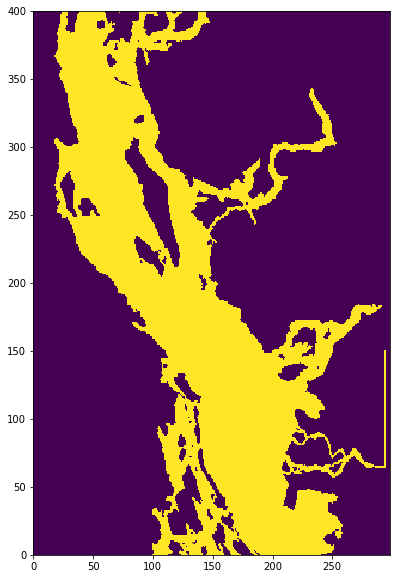

In [24]:
fig, ax = plt.subplots(figsize = (12,10))
ax.pcolormesh(mesh.variables['tmask'][0,0,350:750,  100:])
viz_tools.set_aspect(ax);

In [25]:
f9surface.shape

(192, 400, 298)

In [26]:
together = np.append(f0surface, f1surface, axis = 0)
for f in ([f2surface,f3surface,f4surface,f5surface,f6surface,f7surface,f8surface,f9surface, 
           f10surface, f11surface, f12surface, f13surface, f14surface, f15surface, f16surface,
           f17surface, f18surface, f19surface, f20surface, f21surface, f22surface, f23surface,
           f24surface, f25surface, f26surface, f27surface, f28surface, f29surface, f30surface]):
    together = np.append(together, f, axis = 0)
f.shape

(120, 400, 298)

In [27]:
together.shape

(7440, 400, 298)

In [28]:
reshaped_f = np.ma.reshape(np.ma.masked_array(together, 
                                              mask = (1-mesh.variables['tmask'][:,0,350:750,100:])
                                              *np.ones((7440,1,1))), ((7440, -1)))

In [29]:
reshaped_f.shape

(7440, 119200)

In [30]:
Z = np.reshape(reshaped_f.compressed(), ((7440, -1)))

In [31]:
Z.shape

(7440, 38817)

In [32]:
Z2 = np.ma.reshape(np.ma.masked_array(together[:,::5,::5], 
                                      mask = (1-mesh.variables['tmask'][:,0,350:750:5,100::5])
                                      *np.ones((7440,1,1))).compressed(), 
                   ((7440, -1)))

In [33]:
Z2.shape

(7440, 1554)

In [34]:
A_prime, sqrtL, E_T = np.linalg.svd(Z2 - Z2.mean(axis=0)[np.newaxis, :], 
                                    full_matrices=False)
A = A_prime.dot(np.diag(sqrtL))
PercentVar = sqrtL**2/(sqrtL**2).sum()
Z_0 = A[:, 0, np.newaxis].dot(E_T[0, np.newaxis, :])
Z_1 = A[:, 1, np.newaxis].dot(E_T[1, np.newaxis, :])

84
300
528
732
936
1128
1284
1392
1680
2016
2232
2544
2832
3336
3900
4104
4200
4584
4968
5160
5352
5520
5964
6348
6468
6612
6828
7008
7128
7260
7380


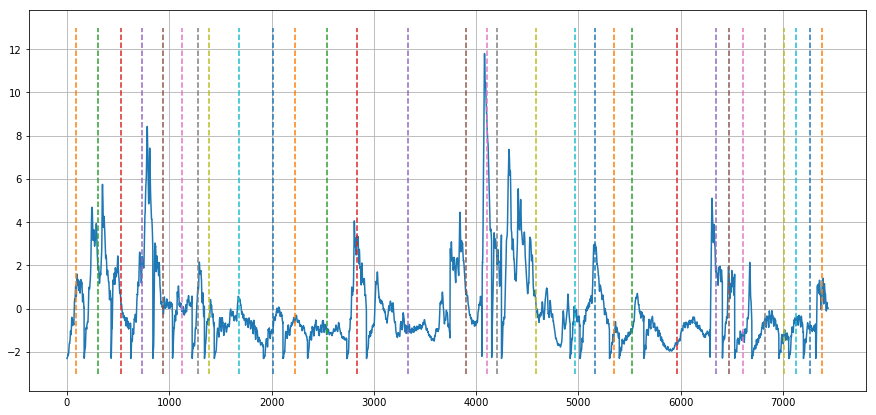

In [38]:
fig, ax = plt.subplots(figsize = ((15,7)))
ax.plot(A[:,0].T)
ax.grid('on')
n = 0
for f in ([f0surface, f1surface, f2surface,f3surface,f4surface,f5surface,f6surface,f7surface,
           f8surface,f9surface, f10surface, f11surface, f12surface, f13surface, f14surface, 
           f15surface, f16surface, f17surface, f18surface, f19surface, f20surface, f21surface, 
           f22surface, f23surface,f24surface, f25surface, f26surface, f27surface, f28surface, 
           f29surface, f30surface]):
    j = f.shape[0]/2
    ax.plot((j+n, j+n), (-3,13), '--')
    print(int(j+n))
    n = n + f.shape[0]        

In [39]:
from salishsea_tools import timeseries_tools, geo_tools, tidetools

In [40]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

In [41]:
bathy, X, Y = tidetools.get_bathy_data(grid)

In [42]:
PercentVar[0]

0.46866173

In [43]:
PercentVar[1]

0.09738887

In [65]:
PercentVar[2]

0.08296388

In [44]:
lats = grid.variables['nav_lat'][350:750:5,100::5]
lons = grid.variables['nav_lon'][350:750:5,100::5]

compressed_lats0 = np.ma.masked_array(lats, 
                                     mask = 1 - 
                                      mesh.variables['tmask'][0,0,350:750:5,100::5]).compressed()
compressed_lons0 = np.ma.masked_array(lons, 
                                     mask = 1 
                                      - mesh.variables['tmask'][0,0,350:750:5,100::5]).compressed()

In [60]:
Yinds = np.array([])
Xinds = np.array([])
for lon, lat in zip(compressed_lons0, compressed_lats0):
    Yind, Xind = geo_tools.find_closest_model_point(lon, lat, X[350:750:5,100::5],
                                                    Y[350:750:5,100::5], 
                                                    land_mask = bathy.mask[350:750:5,100::5])
    Yinds = np.append(Yinds, Yind)
    Xinds = np.append(Xinds, Xind)

In [47]:
for n in [84,300,528,732,936,1128,1284,1392,1680,2016,2232,2544,2832,3336,3900,4104,4200,
          4584,4968,5160,5352,5520,5964,6348,6468,6612,6828,7008,7128,7260,7380]:
    print(Z_0[n,:].max(), Z_0[n,:].min())

0.06811587 -0.00052531075
0.13897341 -0.0010717653
0.01640514 -0.00012651672
0.1440527 -0.0011109369
0.004737006 -3.6531874e-05
4.419483e-05 -0.0057306443
0.05613711 -0.00043293036
0.00018002042 -0.023342846
0.028117038 -0.00021683908
0.00042940865 -0.055680458
0.00024032043 -0.031161811
0.00048275662 -0.06259797
0.19935344 -0.0015374172
0.00043721066 -0.05669213
0.04239978 -0.00032698782
0.58311963 -0.0044970284
0.17368048 -0.0013394268
0.018994289 -0.00014648428
7.31801e-05 -0.0094890995
0.18818472 -0.0014512837
0.00048631334 -0.06305916
0.0005413638 -0.07019743
0.0008300975 -0.107636884
0.12717052 -0.0009807412
0.124620385 -0.00096107455
0.00063147704 -0.08188221
0.00032095247 -0.04161719
0.0005376265 -0.069712825
0.00027511013 -0.035672914
0.0004835766 -0.062704295
0.04790278 -0.00036942709


In [48]:
import cmocean

In [61]:
max(Yinds)

79.0

In [62]:
mesh.variables['tmask'][0,0,350:750:5, 100::5].shape

(80, 60)

/home/vdo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


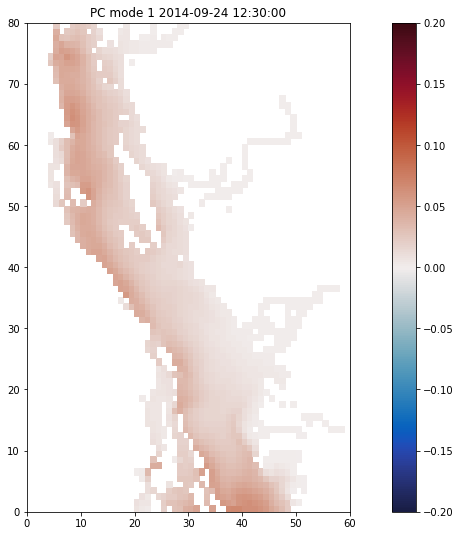

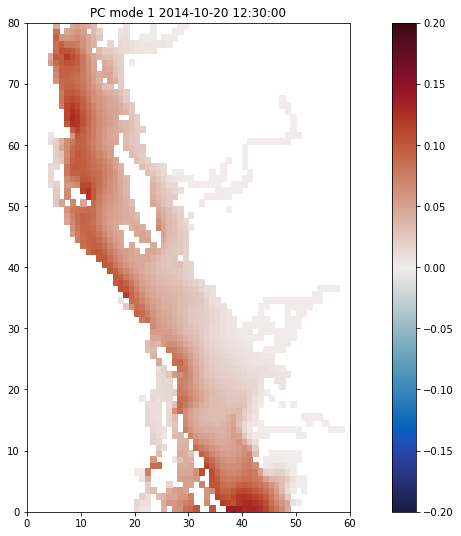

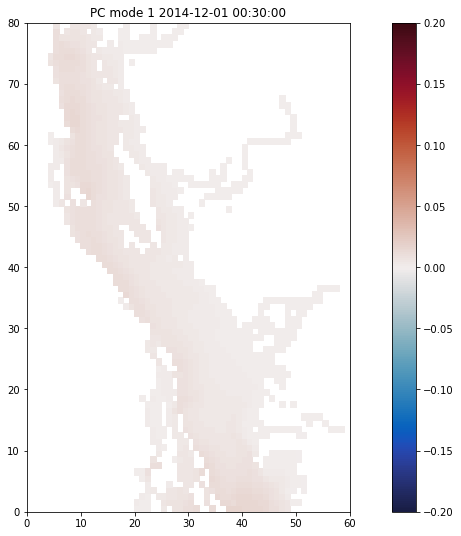

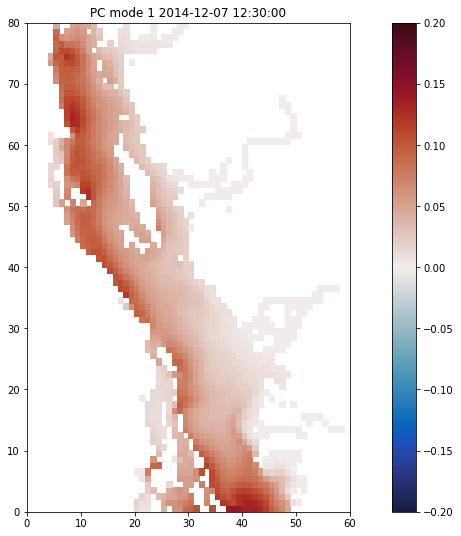

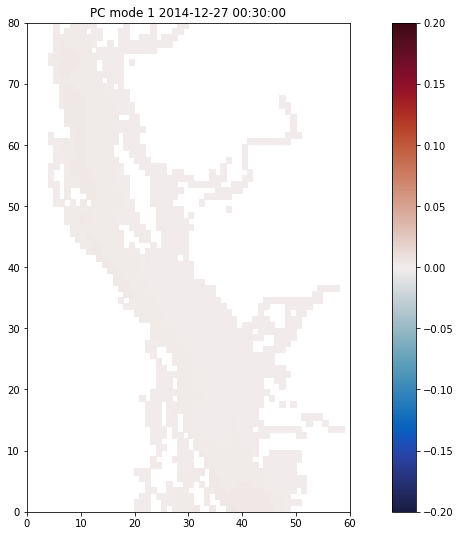

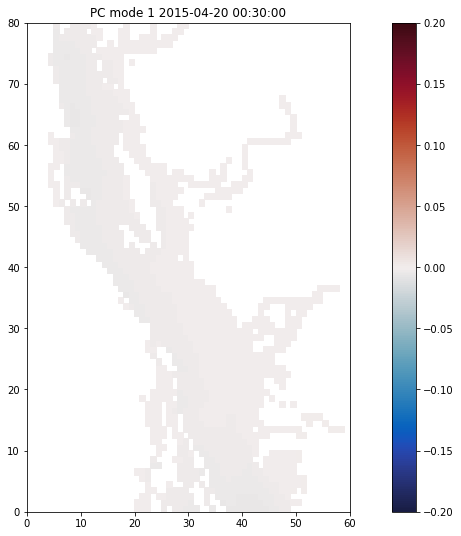

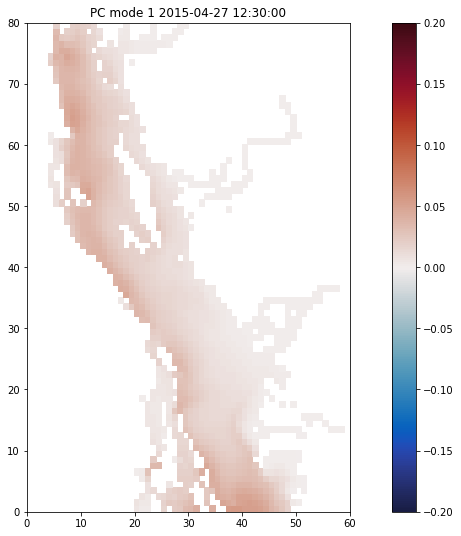

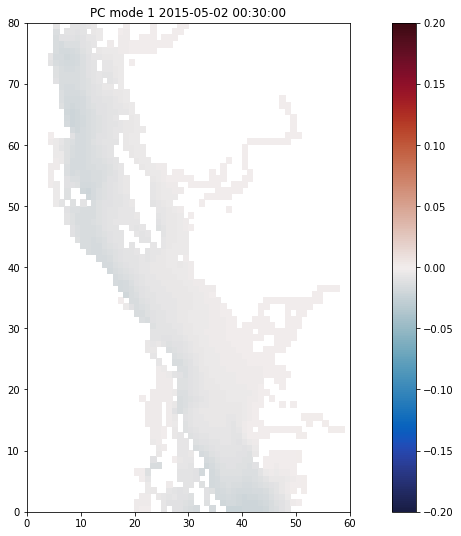

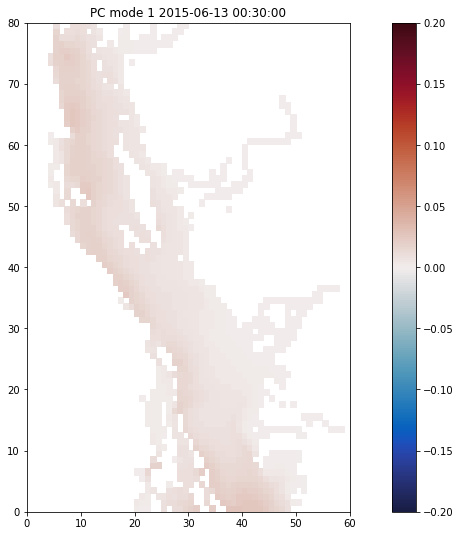

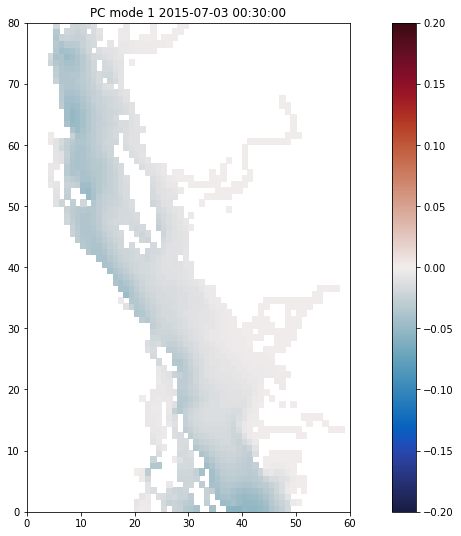

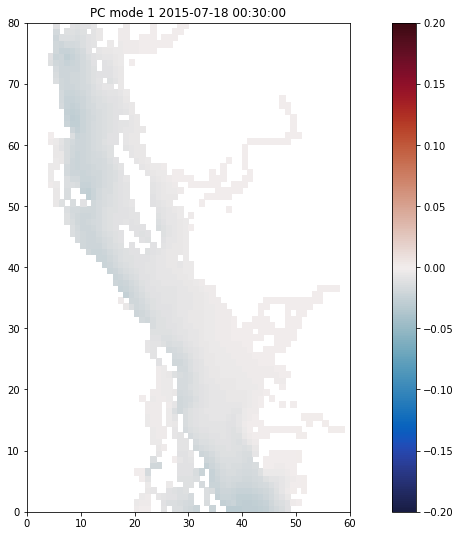

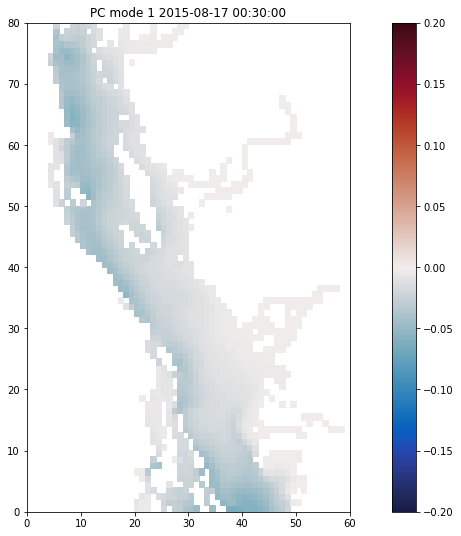

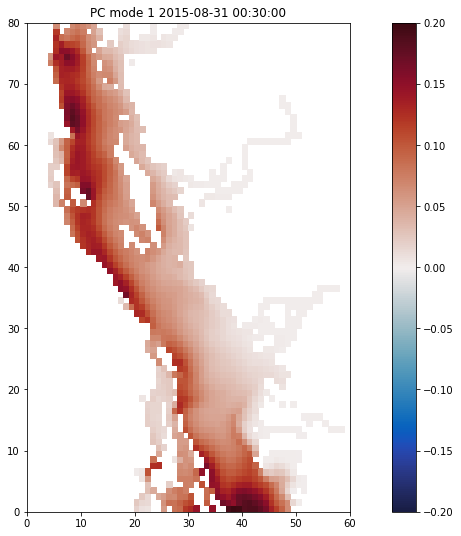

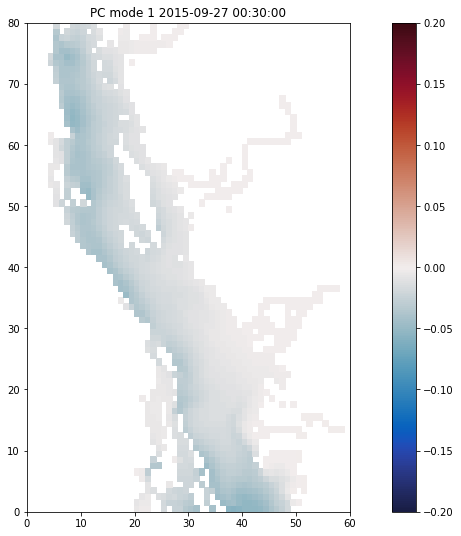

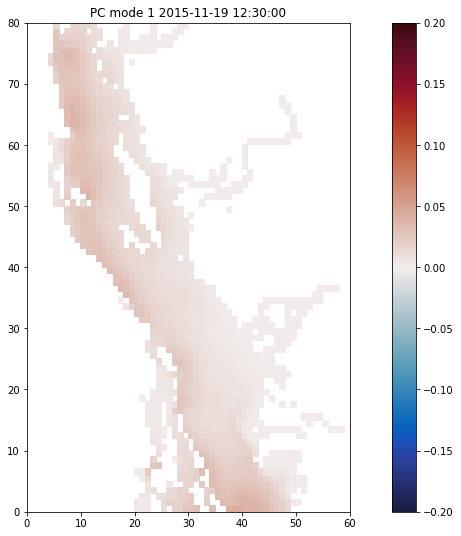

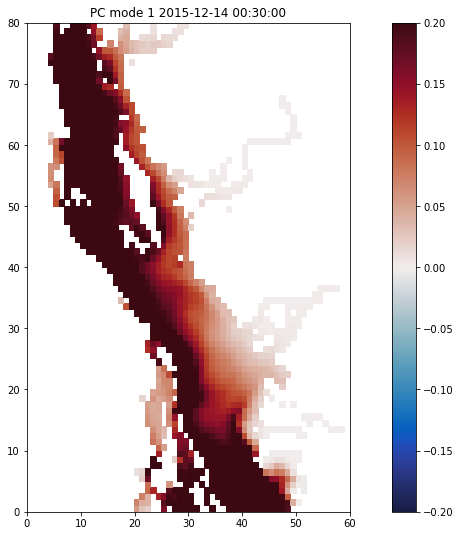

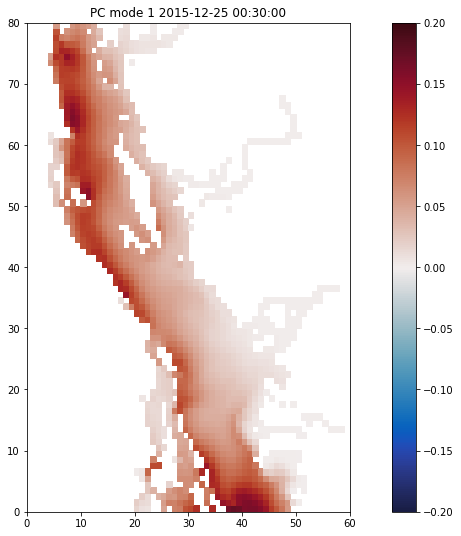

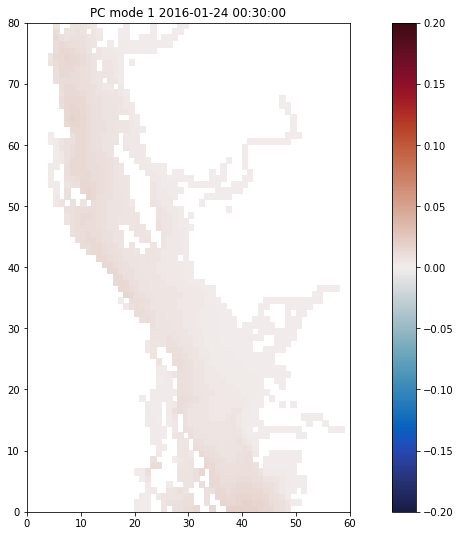

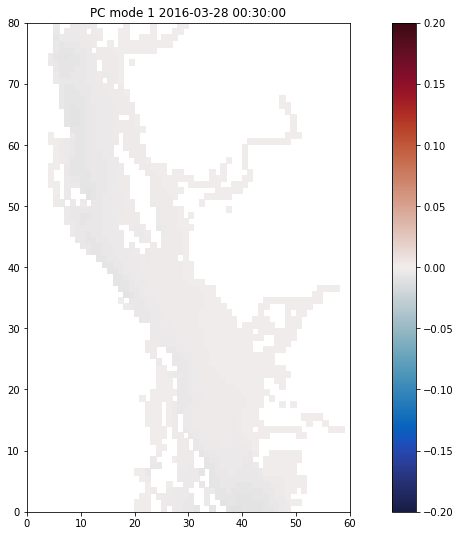

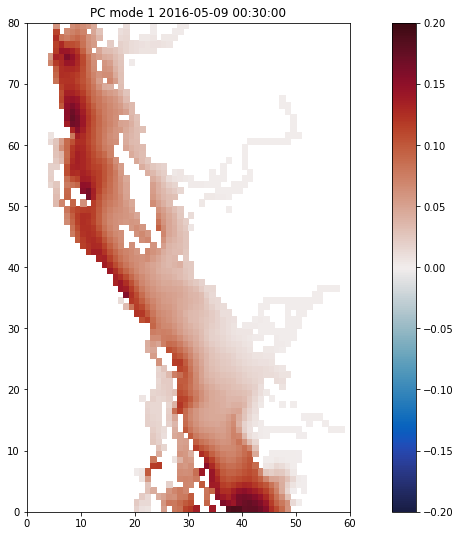

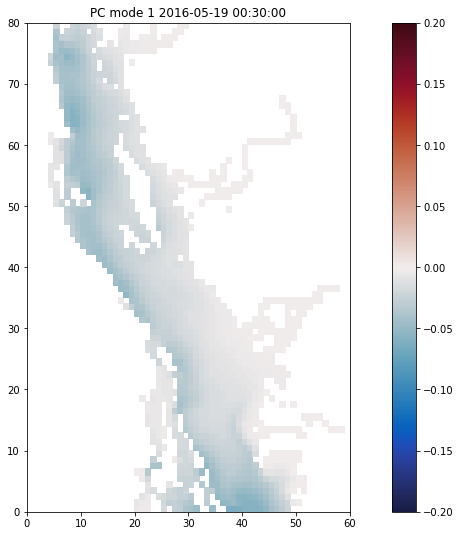

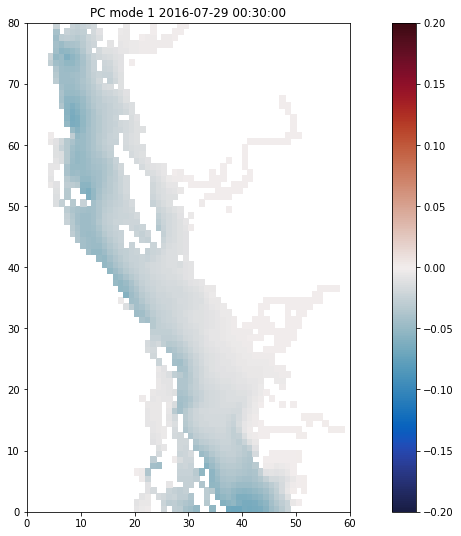

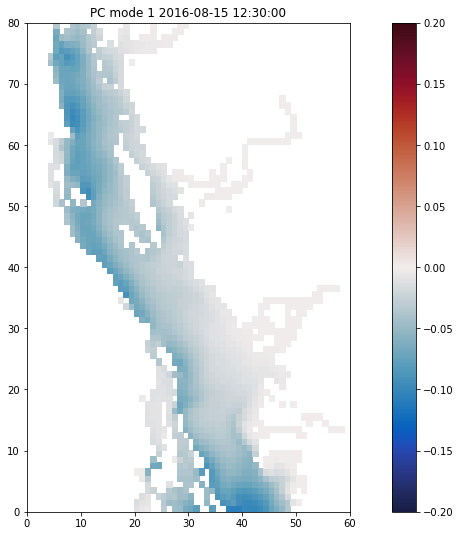

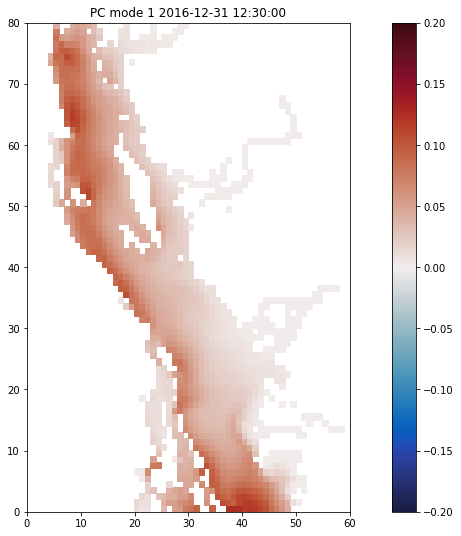

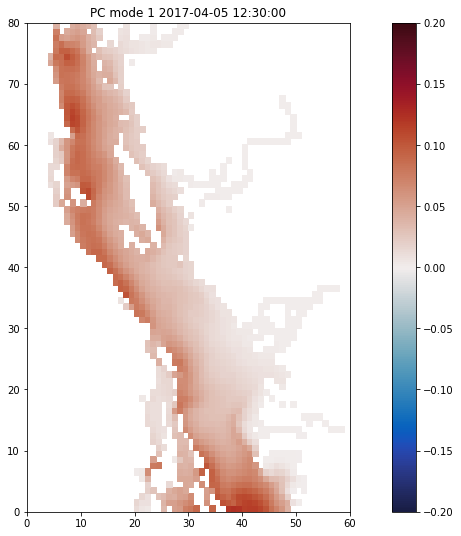

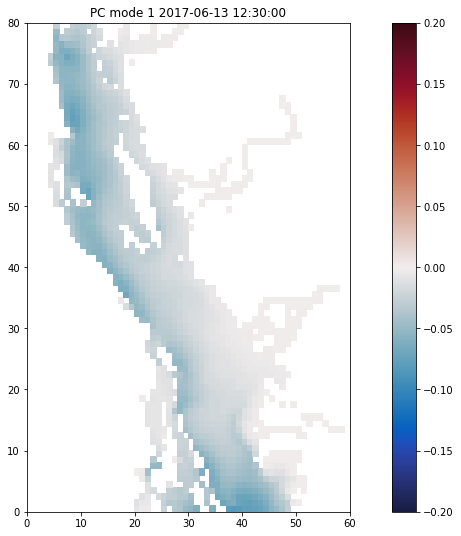

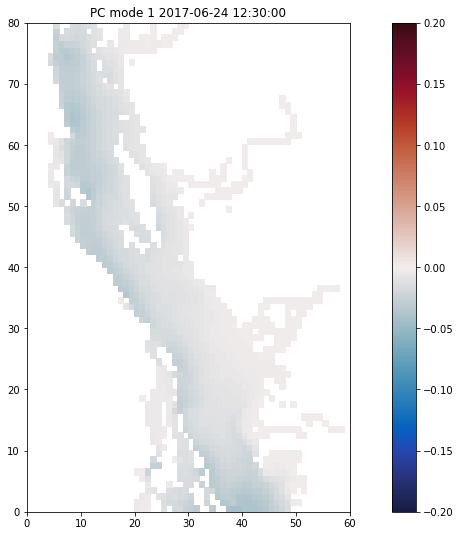

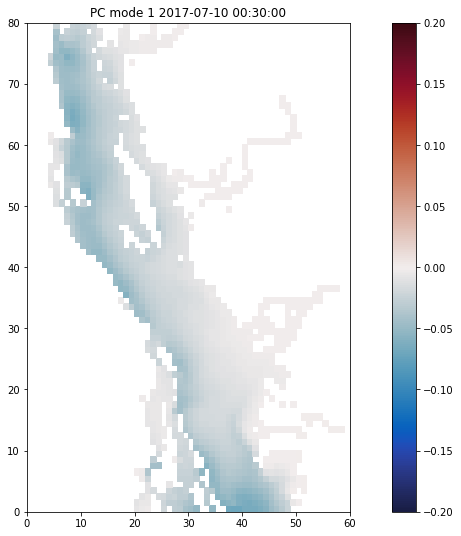

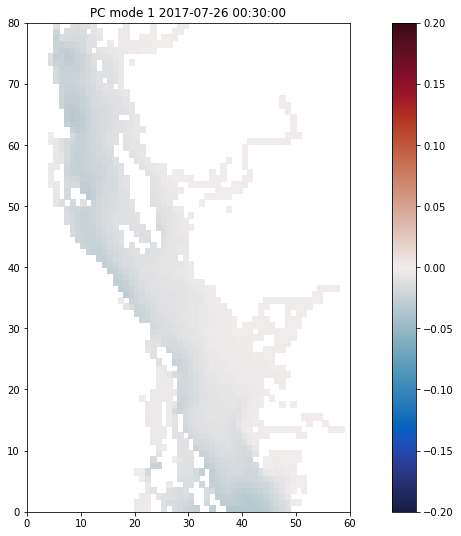

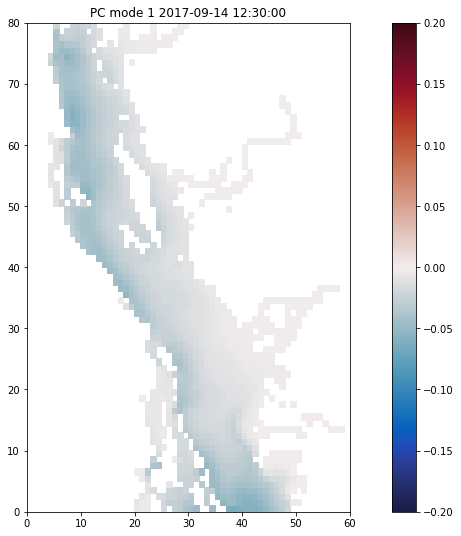

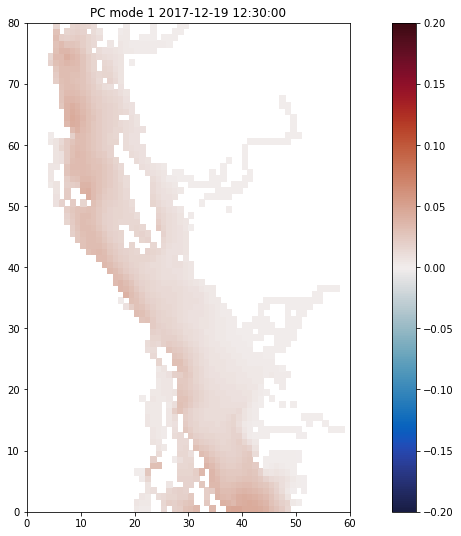

In [64]:
for n,p in zip([84,300,528,732,936,1128,1284,1392,1680,2016,2232,2544,2832,3336,3900,4104,4200,
                4584,4968,5160,5352,5520,5964,6348,6468,6612,6828,7008,7128,7260,7380], 
               [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,
                f22,f23,f24,f25,f26,f27,f28,f29,f30]):
    gridded = np.zeros((80,60))
    for Yind, Xind, data in zip(Yinds, Xinds, Z_0[n,:]):
        gridded[int(Yind), int(Xind)] = data
    fig, ax = plt.subplots(figsize = ((15,9)))
    z = ax.pcolormesh(np.ma.masked_array(gridded, 
                                         mask = 1 - 
                                         mesh.variables['tmask'][0,0,350:750:5, 100::5]),
                      vmin = -0.20, vmax = 0.2, cmap = cmocean.cm.balance)
    fig.colorbar(z, ax=ax)
    middle = p.variables['time_counter'].shape[0]/2
    ax.set_title('PC mode 1 ' + str(nc.num2date(p.variables['time_counter'][middle], 
                                                p.variables['time_counter'].units)))
    viz_tools.set_aspect(ax);

In [34]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = np.eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u,s,vh = np.linalg.svd(np.dot(Phi.T,np.asarray(Lambda)**3 
                                - (gamma/p) * np.dot(Lambda, 
                                                     np.diag(np.diag(np.dot(Lambda.T,Lambda))))))
        R = np.dot(u,vh)
        d = np.sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return np.dot(Phi, R)

In [9]:
C = Z - Z.mean(axis=0)[np.newaxis, :]

In [11]:
R = np.eye(38817)

In [ ]:
p = 2712
gamma = 1.0
tol = 1e-6
d=0
for i in range(20):
    d_old = d
    Lambda = np.dot(C, R)
    u,s,vh = np.linalg.svd(np.dot(C.T,np.asarray(Lambda)**3 
                            - (gamma/p) * np.dot(Lambda, 
                                                 np.diag(np.diag(np.dot(Lambda.T,Lambda))))))
    R = np.dot(u,vh)
    d = np.sum(s)
    if d_old!=0 and d/d_old < 1 + tol: break